In [1]:
cd ..

/cellar/users/agross/TCGA_Code/DX/Notebooks


importing IPython notebook from metaPCNA

importing IPython notebook from Imports

0.922514619883


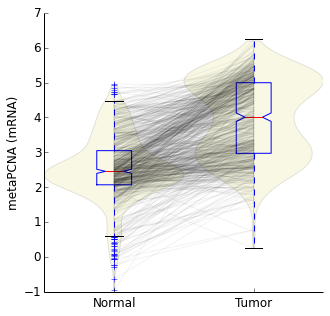

In [2]:
import NotebookImport
from metaPCNA import *

In [3]:
cd Notebooks/

/cellar/users/agross/TCGA_Code/DX/Notebooks


In [4]:
from Preprocessing.ClinicalDataFilters import *

importing IPython notebook from Preprocessing/ClinicalDataFilters

importing IPython notebook from Preprocessing/ClinicalData

PCPG
UCS
TGCT
CHOL
THYM
MESO
FPPP


/cellar/users/agross/anaconda2/lib/python2.7/site-packages/Processing/ProcessClinicalDataPortal.py:37: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index,col_indexer] = value instead
  f['vitalstatus'] = f['daystodeath'].isnull()


In [18]:
dp = -1*meta_pcna_all.unstack()[['01','11']].dropna().T.diff().ix['11']
#dp = dp[dp > 0]

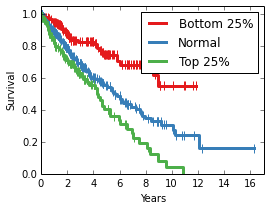

In [24]:
draw_survival_curves(meta_pcna_all[:,'01'].ix[dp.index], surv)

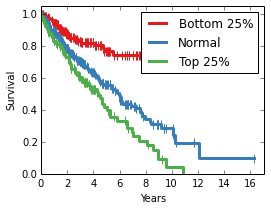

In [22]:
draw_survival_curves(dp, surv)

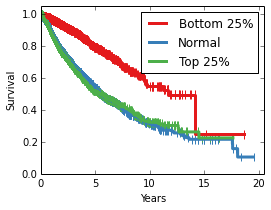

In [14]:
draw_survival_curves(meta_pcna_all[:,'01'], surv)

In [5]:
v = rna_df.xs('01',1,1).columns
s2 = surv_5y
idx = v.intersection(s2.index.levels[0]).intersection(codes.index)
s2 = surv_5y.ix[idx]
cc = codes.ix[idx]
fmla = robjects.Formula('Surv(days, event) ~ feature + strata(codes)')

In [6]:
standardize = lambda s: s.sub(s.mean(1), axis=0).div(s.std(1), axis=0)

In [7]:
df = rna_df.xs('01',1,1).ix[:, idx]
f = dx_rna.frac.order()
df = df.ix[f.index]
#df = df.sub(df.mean(1), 0).div(df.std(1), 0)
df = df.groupby(cc, axis=1).apply(standardize)

In [8]:
s3 = s2.unstack().ix[ti(s2.unstack().days > 30)].stack()
v.name = 'feature'
cc.name= 'codes'

In [9]:
r_pancan = pd.read_csv('./r_pancan_new_within.csv',
                       header=None, index_col=0, squeeze=True)
haz = np.exp(r_pancan.order())

In [28]:
r_pancan = pd.read_csv('./r_pancan_new_2.csv',
                       header=None, index_col=0, squeeze=True)
haz = np.exp(r_pancan.order())

(0.7, 1.3)

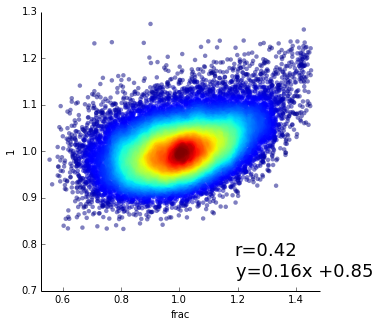

In [10]:
plot_regression(dx_rna.frac+.5, haz, density=True, rad=.03, s=20,
                line_args={'lw':0}, rasterized=True)
plt.gca().set_ylim(.7, 1.3)

(0.7, 1.3)

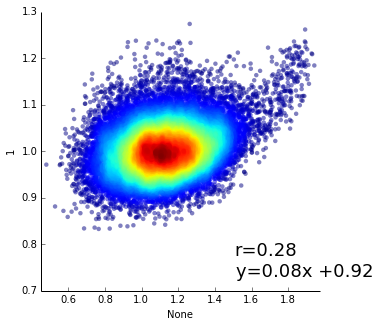

In [11]:
plot_regression(pcna_corr+1, haz, density=True, rad=.03, s=20,
                line_args={'lw':0}, rasterized=True)
plt.gca().set_ylim(.7, 1.3)

(0.7, 1.3)

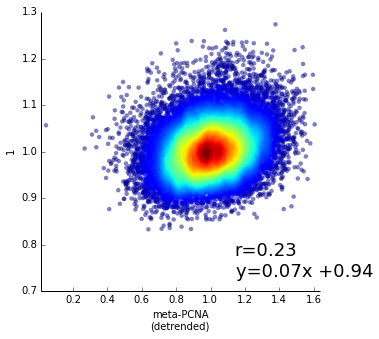

In [43]:
plot_regression(pcna_win+1, haz, density=True, rad=.03, s=20,
                line_args={'lw':0}, rasterized=True)
plt.gca().set_ylim(.7, 1.3)

(0.7, 1.3)

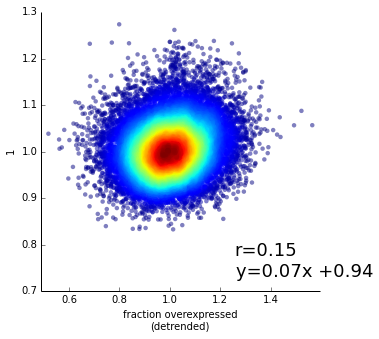

In [42]:
plot_regression(f_win+1, haz, density=True, rad=.03, s=20,
                line_args={'lw':0}, rasterized=True)
plt.gca().set_ylim(.7, 1.3)

In [33]:
t = pd.concat([dx_rna, pcna_corr, haz, f_win], 1, keys=['dx','pnca','hr','f_win'], 
          ).sort([('hr',1)]).dropna()[::-1]
t[t[('pnca',0)] < .5].head()

dx                          pnca    hr                                f_win
         num_ox  num_dx  frac         p     0     1  fraction overexpressed\n(detrended)
ANXA2P3     418     684  0.61  6.76e-09  0.30  1.36                                 0.01
IMPDH1      532     684  0.78  2.88e-50  0.49  1.36                                 0.09
APCDD1L     273     680  0.40  3.12e-07  0.33  1.36                                -0.20
GPX8        444     684  0.65  5.29e-15  0.22  1.35                                 0.09
ANXA2P2     392     684  0.57  1.50e-04  0.43  1.35                                -0.08

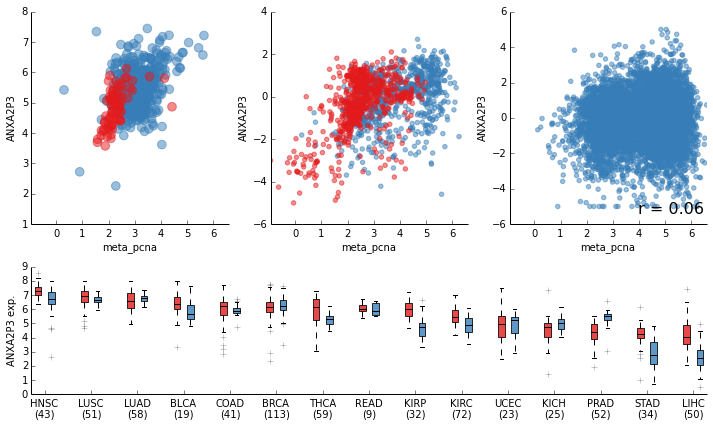

In [35]:
switch_plot('ANXA2P3')

In [34]:
fmla2 = robjects.Formula('Surv(days, event) ~ feature + meta_pcna + strata(codes)')
m = get_cox_ph(s3, df.ix['ANXA2P3'], [cc, meta_pcna], formula=fmla2, print_desc=True)


           coef exp(coef) se(coef)    z       p
feature   0.161      1.17   0.0243 6.60 4.1e-11
meta_pcna 0.309      1.36   0.0413 7.48 7.2e-14

Likelihood ratio test=105  on 2 df, p=0  n= 7814, number of events= 1811 



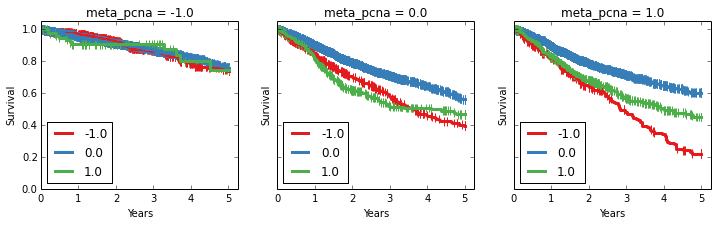

In [36]:
draw_survival_curves(to_quants(rna_df.ix['ANXA2P3'][:,'01'], std=1),
                     surv_5y, to_quants(meta_pcna, q=.33),
                     legend=True)